In [1]:
# Part 1 - Building the CNN
#importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
import tensorflow as tf

In [2]:
# Initialing the CNN
classifier = Sequential()


# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, (3,  3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(Convolution2D(32, (3,  3), input_shape = (64, 64, 3), activation = 'relu'))
#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size =(2,2)))


# Adding second convolution layer
classifier.add(Convolution2D(32, (3,  3), padding= 'same',  activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

#Adding 3rd Convolution Layer
classifier.add(Convolution2D(64, (3,  3), padding= 'same',  activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))


#Step 3 - Flattening
classifier.add(Flatten())

#Step 4 - Full Connection
classifier.add(Dense(784, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(25, activation = 'softmax'))

In [3]:
#Compiling The CNN
classifier.compile(
              optimizer = optimizers.Adam(lr = 0.00001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)

c:\Semester 2\Git\aasd4011-winter-2023\tensorflow_cpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'C:/Users/prana/OneDrive/Desktop/ProjectSign/dataPinkush/data/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

validation_set = test_datagen.flow_from_directory(
        'C:/Users/prana/OneDrive/Desktop/ProjectSign/dataPinkush/data/validation_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 7837 images belonging to 25 classes.
Found 2240 images belonging to 25 classes.


In [5]:

model = classifier.fit(
        training_set,
        steps_per_epoch=234,
        epochs=60,
        verbose=1,
        validation_data= validation_set,
        validation_steps=67)

print(classifier.summary())
'''#Saving the model
import h5py'''
classifier.save('C:/Users/prana/OneDrive/Desktop/ProjectSign/Handgesture_Final_CNN_d_31_march_alphabet.h5')

Epoch 1/60
234/234 [==============================] - 59s 253ms/step - loss: 3.1402 - accuracy: 0.1241 - val_loss: 3.0441 - val_accuracy: 0.1479
Epoch 2/60
234/234 [==============================] - 29s 122ms/step - loss: 2.6557 - accuracy: 0.3065 - val_loss: 2.3815 - val_accuracy: 0.3619
Epoch 3/60
234/234 [==============================] - 23s 96ms/step - loss: 1.9455 - accuracy: 0.4700 - val_loss: 1.8018 - val_accuracy: 0.5182
Epoch 4/60
234/234 [==============================] - 24s 103ms/step - loss: 1.4922 - accuracy: 0.5971 - val_loss: 1.4426 - val_accuracy: 0.6068
Epoch 5/60
234/234 [==============================] - 26s 109ms/step - loss: 1.1889 - accuracy: 0.6727 - val_loss: 1.1105 - val_accuracy: 0.6796
Epoch 6/60
234/234 [==============================] - 22s 92ms/step - loss: 0.9238 - accuracy: 0.7330 - val_loss: 0.9248 - val_accuracy: 0.6875
Epoch 7/60
234/234 [==============================] - 25s 105ms/step - loss: 0.7464 - accuracy: 0.7786 - val_loss: 0.7945 - val_accu

In [6]:
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        1

In [7]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


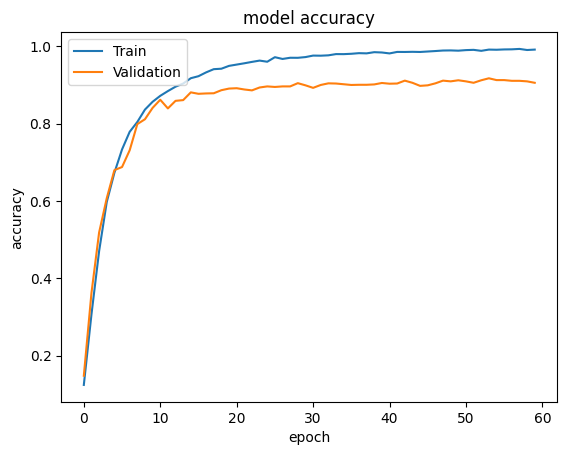

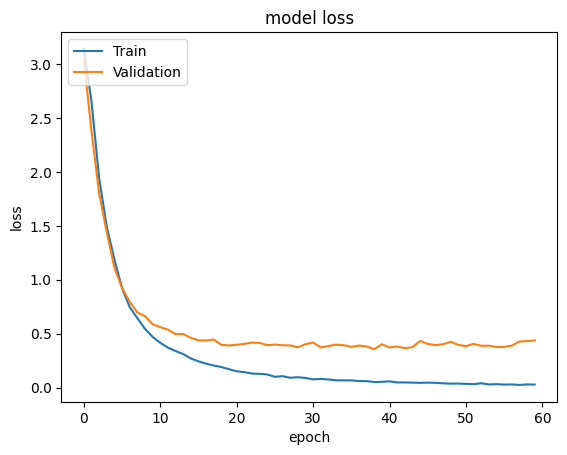

In [8]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model.history['accuracy'], label = "Train accuarcy")
plt.plot(model.history['val_accuracy'],label = "Val accuarcy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
# "Accuracy from test sets"
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'C:/Users/prana/OneDrive/Desktop/ProjectSign/dataPinkush/data/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
loss,accuracy = classifier.evaluate_generator(test_set, steps=56)
print("Testing accuracy:",accuracy)

Found 1119 images belonging to 25 classes.


C:\Users\prana\AppData\Local\Temp\ipykernel_5580\1470623383.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy = classifier.evaluate_generator(test_set, steps=56)


Testing accuracy: 0.8847184777259827


In [10]:

# Initialing the CNN
classifier2 = Sequential()

# Step 1 - Convolution Layer
classifier2.add(Convolution2D(32, (3,  3), input_shape = (64, 64, 3), activation = 'relu'))
classifier2.add(Convolution2D(32, (3,  3), input_shape = (64, 64, 3), activation = 'relu'))
#step 2 - Pooling
classifier2.add(MaxPooling2D(pool_size =(2,2)))


# Adding second convolution layer
classifier2.add(Convolution2D(64, (3,  3), padding= 'same',  activation = 'relu'))
classifier2.add(Convolution2D(64, (3,  3), padding= 'same',  activation = 'relu'))
Dropout(0.5)
classifier2.add(MaxPooling2D(pool_size =(2,2)))


#Adding 3rd Convolution Layer
classifier2.add(Convolution2D(128, (3,  3), padding= 'same',  activation = 'relu'))
classifier2.add(Convolution2D(128, (3,  3), padding= 'same',  activation = 'relu'))
Dropout(0.5)
classifier2.add(MaxPooling2D(pool_size =(2,2)))


classifier2.add(Convolution2D(256, (3,  3), padding= 'same',  activation = 'relu'))
classifier2.add(Convolution2D(256, (3,  3), padding= 'same',  activation = 'relu'))

#Step 3 - Flattening
classifier2.add(Flatten())

#Step 4 - Full Connection
classifier2.add(Dense(784, activation = 'relu'))
classifier2.add(Dropout(0.5))
classifier2.add(Dense(256, activation = 'relu'))
classifier2.add(Dense(25, activation = 'softmax'))

In [11]:
#Compiling The CNN
classifier2.compile(
              optimizer = optimizers.Adam(lr = 0.00001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Part 2 Fittting the CNN to the image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)

c:\Semester 2\Git\aasd4011-winter-2023\tensorflow_cpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'C:/Users/prana/OneDrive/Desktop/ProjectSign/dataPinkush/data/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

validation_set = test_datagen.flow_from_directory(
        'C:/Users/prana/OneDrive/Desktop/ProjectSign/dataPinkush/data/validation_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 7837 images belonging to 25 classes.
Found 2240 images belonging to 25 classes.


In [13]:
model2 = classifier2.fit(
        training_set,
        steps_per_epoch=234,
        epochs=60,
        verbose=1,
        validation_data= validation_set,
        validation_steps=67)


Epoch 1/60
234/234 [==============================] - 54s 229ms/step - loss: 2.9400 - accuracy: 0.1574 - val_loss: 2.1913 - val_accuracy: 0.4062
Epoch 2/60
234/234 [==============================] - 53s 228ms/step - loss: 1.6565 - accuracy: 0.5173 - val_loss: 1.2496 - val_accuracy: 0.6381
Epoch 3/60
234/234 [==============================] - 62s 265ms/step - loss: 0.9807 - accuracy: 0.6890 - val_loss: 0.7683 - val_accuracy: 0.7654
Epoch 4/60
234/234 [==============================] - 70s 300ms/step - loss: 0.6573 - accuracy: 0.7874 - val_loss: 0.6041 - val_accuracy: 0.8176
Epoch 5/60
234/234 [==============================] - 72s 309ms/step - loss: 0.4742 - accuracy: 0.8461 - val_loss: 0.5018 - val_accuracy: 0.8554
Epoch 6/60
234/234 [==============================] - 68s 291ms/step - loss: 0.3728 - accuracy: 0.8771 - val_loss: 0.4504 - val_accuracy: 0.8825
Epoch 7/60
234/234 [==============================] - 54s 230ms/step - loss: 0.2825 - accuracy: 0.9093 - val_loss: 0.4925 - val_ac

In [14]:
print(classifier2.summary())
'''#Saving the model
import h5py'''
classifier2.save('C:/Users/prana/OneDrive/Desktop/ProjectSign/Handgesture_Final_CNN_d_31_march_alphabet_2.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                  

In [15]:
print(model2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


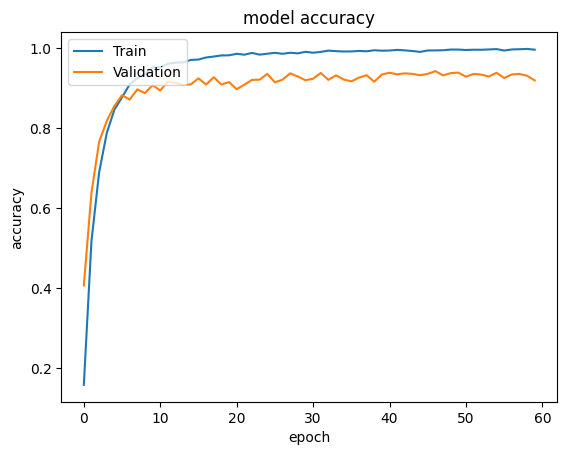

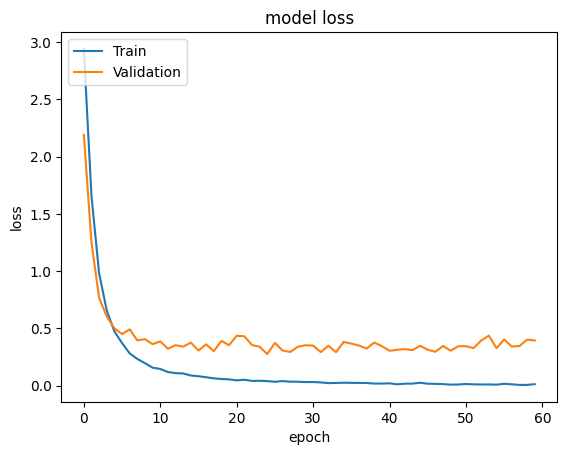

In [16]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model2.history['accuracy'], label = "Train accuarcy")
plt.plot(model2.history['val_accuracy'],label = "Val accuarcy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(model2.history['loss'])
plt.plot(model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
# "Accuracy from test sets"
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'C:/Users/prana/OneDrive/Desktop/ProjectSign/dataPinkush/data/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
loss,accuracy = classifier2.evaluate(test_set, steps=56)
print("Testing accuracy:",accuracy)

Found 1119 images belonging to 25 classes.
56/56 [==============================] - 1s 23ms/step - loss: 1.0341 - accuracy: 0.8785
Testing accuracy: 0.8784629106521606
